# Temporal Distribution Summary

**Single comprehensive figure showing dataset temporal concentration.**

---

## 1. Setup & Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

sys.path.append('../../dsa4263_group_project')
from data_cleaning_finalized import DataCleaner

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("✅ Setup complete")

✅ Setup complete


## 2. Load and Clean Data

In [9]:
DATA_PATH = Path('../../data/processed/date_merge.csv')
df = pd.read_csv(DATA_PATH)
print(f"✅ Loaded: {df.shape}")

original_count = len(df)
cleaner = DataCleaner()
df_cleaned = cleaner.clean_dates(df, date_col='date')
retention_rate = (len(df_cleaned) / original_count) * 100
print(f"✅ Cleaned: {len(df_cleaned):,} rows ({retention_rate:.1f}% retention)")

✅ Loaded: (49301, 7)
Dropped 77 rows with missing/unparseable dates (0.16%)
✅ Cleaned: 49,224 rows (99.8% retention)


## 3. Extract Temporal Features

In [10]:
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['month_name'] = df_cleaned['date'].dt.month_name()
df_cleaned['date_only'] = df_cleaned['date'].dt.date
df_cleaned['hour'] = df_cleaned['date'].dt.hour
print("✅ Features extracted")

✅ Features extracted


## 4. Distribution Summary

✅ Saved: ../../figures/4.2.3_temporal_distribution.png
   Resolution: 300 DPI
   Size: 0.50 MB


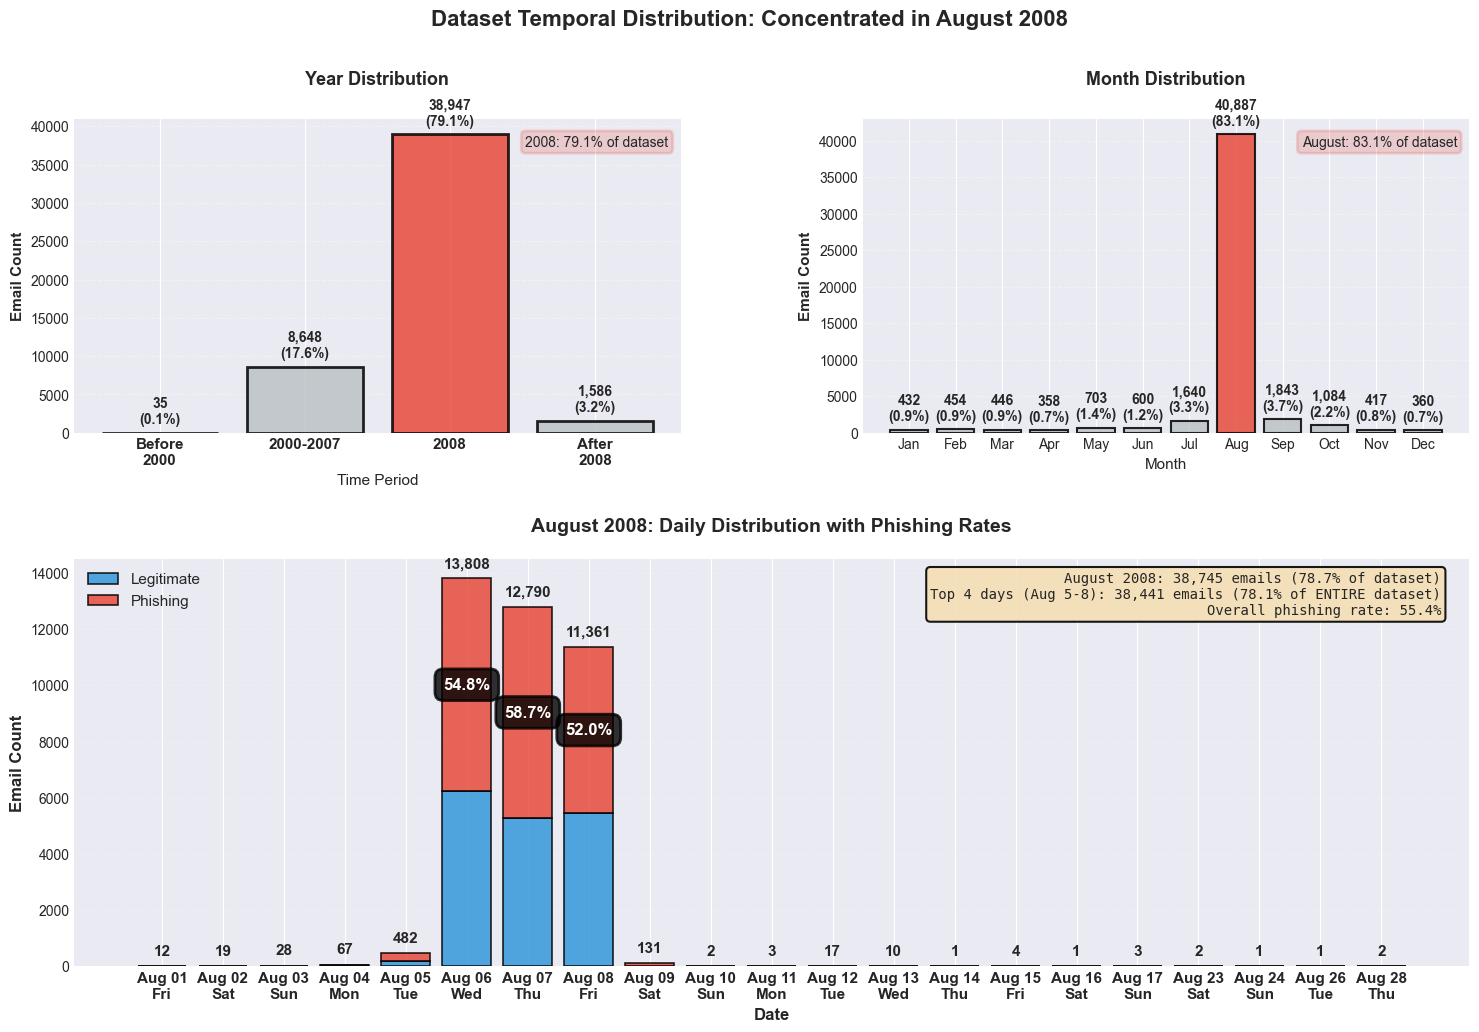

In [11]:
OUTPUT_DIR = Path('../../figures')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Create figure
fig = plt.figure(figsize=(18, 11))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3, height_ratios=[1, 1.3])

# Year - Aggregated
ax1 = fig.add_subplot(gs[0, 0])
year_counts = df_cleaned['year'].value_counts()
before_2000 = sum([year_counts.get(y, 0) for y in range(1900, 2000)])
y2000_2007 = sum([year_counts.get(y, 0) for y in range(2000, 2008)])
y2008 = year_counts.get(2008, 0)
after_2008 = sum([year_counts.get(y, 0) for y in range(2009, 2030)])
year_periods = ['Before\n2000', '2000-2007', '2008', 'After\n2008']
year_values = [before_2000, y2000_2007, y2008, after_2008]
year_colors_agg = ['#BDC3C7', '#BDC3C7', '#E74C3C', '#BDC3C7']
bars1 = ax1.bar(range(len(year_periods)), year_values, color=year_colors_agg, 
                alpha=0.85, edgecolor='black', linewidth=2)
ax1.set_xticks(range(len(year_periods)))
ax1.set_xticklabels(year_periods, fontsize=11, fontweight='bold')
ax1.set_title('Year Distribution', fontsize=13, fontweight='bold', pad=25)
ax1.set_ylabel('Email Count', fontsize=11, fontweight='bold')
ax1.set_xlabel('Time Period', fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(year_values):
    if v > 0:
        pct = (v / len(df_cleaned)) * 100
        ax1.text(i, v + max(year_values)*0.02, f'{v:,}\n({pct:.1f}%)', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')
pct_2008 = (y2008 / len(df_cleaned)) * 100
ax1.text(0.98, 0.95, f'2008: {pct_2008:.1f}% of dataset', 
         transform=ax1.transAxes, fontsize=10, ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='#E74C3C', alpha=0.2, edgecolor='#E74C3C', linewidth=2))

# Month
ax2 = fig.add_subplot(gs[0, 1])
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_full = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
month_data = df_cleaned['month_name'].value_counts()
month_data_ordered = pd.Series([month_data.get(m, 0) for m in month_full], index=month_order)
month_colors = ['#E74C3C' if m == 'Aug' else '#BDC3C7' for m in month_order]
bars2 = ax2.bar(range(12), month_data_ordered.values, color=month_colors, 
                alpha=0.85, edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(12))
ax2.set_xticklabels(month_order, fontsize=10)
ax2.set_title('Month Distribution', fontsize=13, fontweight='bold', pad=25)
ax2.set_ylabel('Email Count', fontsize=11, fontweight='bold')
ax2.set_xlabel('Month', fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(month_data_ordered.values):
    if v > 0:
        pct = (v / len(df_cleaned)) * 100
        ax2.text(i, v + max(month_data_ordered.values)*0.02, f'{v:,}\n({pct:.1f}%)', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')
aug_count = month_data.get('August', 0)
pct_aug = (aug_count / len(df_cleaned)) * 100
ax2.text(0.98, 0.95, f'August: {pct_aug:.1f}% of dataset', 
         transform=ax2.transAxes, fontsize=10, ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='#E74C3C', alpha=0.2, edgecolor='#E74C3C', linewidth=2))

# August 2008
ax3 = fig.add_subplot(gs[1, :])
august_2008 = df_cleaned[(df_cleaned['year'] == 2008) & (df_cleaned['month'] == 8)].copy()

if len(august_2008) > 0:
    date_counts = august_2008['date_only'].value_counts().sort_index()
    date_label_counts = august_2008.groupby(['date_only', 'label']).size().unstack(fill_value=0)
    date_label_counts = date_label_counts.reindex(date_counts.index)
    
    phishing_rates = {}
    for date in date_counts.index:
        date_data = august_2008[august_2008['date_only'] == date]
        phishing_count = (date_data['label'] == 1).sum()
        total_count = len(date_data)
        phishing_rates[date] = (phishing_count / total_count * 100) if total_count > 0 else 0
    
    top_4_dates = date_counts.nlargest(4).index
    # Exclude Aug 05 from showing phishing rate label
    import datetime
    aug_05 = datetime.date(2008, 8, 5)
    dates_to_label = [d for d in top_4_dates if d != aug_05]
    
    x_pos = range(len(date_counts))
    
    if 0 in date_label_counts.columns:
        bars_legit = ax3.bar(x_pos, date_label_counts[0], label='Legitimate', 
                             color='#3498DB', alpha=0.85, edgecolor='black', linewidth=1.2)
    if 1 in date_label_counts.columns:
        bottom_vals = date_label_counts[0] if 0 in date_label_counts.columns else 0
        bars_phish = ax3.bar(x_pos, date_label_counts[1], bottom=bottom_vals, 
                            label='Phishing', color='#E74C3C', alpha=0.85, edgecolor='black', linewidth=1.2)
    
    ax3.set_xticks(x_pos)
    date_labels = [d.strftime('%b %d\n%a') for d in date_counts.index]
    ax3.set_xticklabels(date_labels, fontsize=11, fontweight='bold')
    ax3.set_title('August 2008: Daily Distribution with Phishing Rates', 
                  fontsize=14, fontweight='bold', pad=20)
    ax3.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Email Count', fontsize=12, fontweight='bold')
    ax3.legend(loc='upper left', fontsize=11, framealpha=0.95, edgecolor='black')
    ax3.grid(axis='y', alpha=0.2, linestyle='--')
    
    for i, (date, total) in enumerate(zip(date_counts.index, date_counts.values)):
        ax3.text(i, total + max(date_counts.values)*0.02, f'{total:,}', 
                 ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Only show phishing rate labels for dates_to_label (excludes Aug 05)
    for i, date in enumerate(date_counts.index):
        if date in dates_to_label:
            rate = phishing_rates[date]
            phish_count = date_label_counts.loc[date, 1] if 1 in date_label_counts.columns else 0
            legit_count = date_label_counts.loc[date, 0] if 0 in date_label_counts.columns else 0
            y_pos = legit_count + (phish_count / 2)
            ax3.text(i, y_pos, f'{rate:.1f}%', 
                     ha='center', va='center', fontsize=12, fontweight='bold',
                     color='white', 
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='black', alpha=0.8, linewidth=2))
    
    top_4_count = date_counts[top_4_dates].sum()
    pct_main_4 = (top_4_count / len(df_cleaned)) * 100
    overall_phishing_rate = (august_2008['label']==1).sum()/len(august_2008)*100
    
    info_text = (
        f"August 2008: {len(august_2008):,} emails ({len(august_2008)/len(df_cleaned)*100:.1f}% of dataset)\n"
        f"Top 4 days (Aug 5-8): {top_4_count:,} emails ({pct_main_4:.1f}% of ENTIRE dataset)\n"
        f"Overall phishing rate: {overall_phishing_rate:.1f}%"
    )
    ax3.text(0.98, 0.97, info_text, transform=ax3.transAxes, 
             fontsize=10, verticalalignment='top', horizontalalignment='right', family='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9, edgecolor='black', linewidth=1.5))

fig.suptitle('Dataset Temporal Distribution: Concentrated in August 2008', 
             fontsize=16, fontweight='bold', y=0.98)

output_file = OUTPUT_DIR / '4.2.3_temporal_distribution.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')

print(f"✅ Saved: {output_file}")
print(f"   Resolution: 300 DPI")
print(f"   Size: {output_file.stat().st_size / (1024*1024):.2f} MB")

plt.show()
plt.close()

✅ Saved: ../../figures/4.2.3_geographic_distribution.png


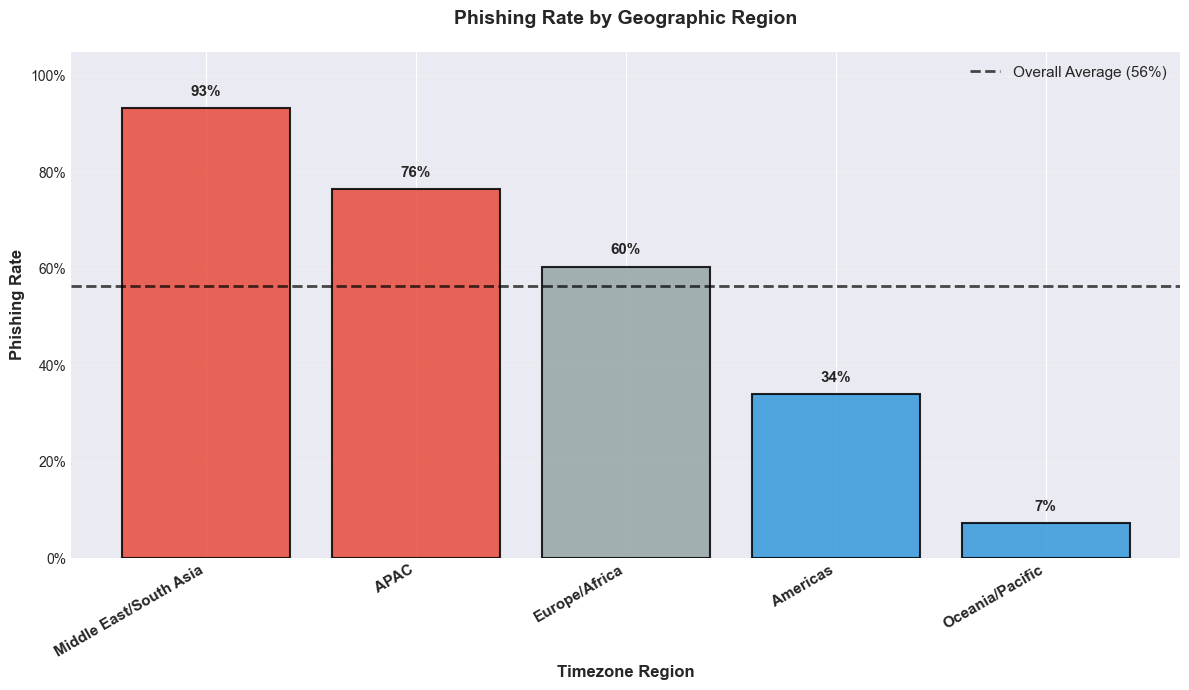

In [12]:
# --- Geographic Distribution Summary ---

# Filter out 'Unknown' region
df_viz = df_cleaned[df_cleaned['timezone_region'] != 'Unknown'].copy()

# Calculate statistics per region
region_stats = df_viz.groupby('timezone_region').agg({
    'label': ['sum', 'count']
}).reset_index()
region_stats.columns = ['region', 'phishing_count', 'total_count']
region_stats['phishing_rate'] = (region_stats['phishing_count'] / region_stats['total_count'] * 100)

# Calculate overall average
overall_phishing_rate = (df_viz['label'].sum() / len(df_viz)) * 100

# Sort by phishing rate (descending)
region_stats = region_stats.sort_values('phishing_rate', ascending=False)

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))

# Define colors based on phishing rate (like the image)
colors = []
for rate in region_stats['phishing_rate']:
    if rate > 80:
        colors.append('#E74C3C')  # Red - Very high risk
    elif rate > 70:
        colors.append('#E74C3C')  # Red - High risk
    elif rate > 50:
        colors.append('#95A5A6')  # Gray - Medium risk
    elif rate > 30:
        colors.append('#3498DB')  # Blue - Low-medium risk
    else:
        colors.append('#3498DB')  # Blue - Low risk

# Create bar chart (phishing rate only, NOT stacked)
x_pos = range(len(region_stats))
bars = ax.bar(x_pos, region_stats['phishing_rate'], color=colors, alpha=0.85, 
              edgecolor='black', linewidth=1.5)

# Customize axes
ax.set_xticks(x_pos)
ax.set_xticklabels(region_stats['region'], rotation=30, ha='right', 
                   fontsize=11, fontweight='bold')
ax.set_ylabel('Phishing Rate', fontsize=12, fontweight='bold')
ax.set_xlabel('Timezone Region', fontsize=12, fontweight='bold')
ax.set_title('Phishing Rate by Geographic Region', 
             fontsize=14, fontweight='bold', pad=20)

# Set y-axis to percentage format
ax.set_ylim(0, 105)
ax.set_yticks(range(0, 101, 20))
ax.set_yticklabels([f'{y}%' for y in range(0, 101, 20)])

# Add horizontal line for overall average
ax.axhline(overall_phishing_rate, color='black', linestyle='--', linewidth=2, 
           alpha=0.7, label=f'Overall Average ({overall_phishing_rate:.0f}%)')

# Add percentage labels on top of bars
for i, rate in enumerate(region_stats['phishing_rate']):
    ax.text(i, rate + 2, f'{rate:.0f}%', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legend
ax.legend(loc='upper right', fontsize=11, framealpha=0.9, edgecolor='black')

# Grid
ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()

output_file = OUTPUT_DIR / '4.2.3_geographic_distribution.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Saved: {output_file}")

plt.show()
plt.close()

✅ Saved: ../../figures/4.2.3_hourly_distribution.png


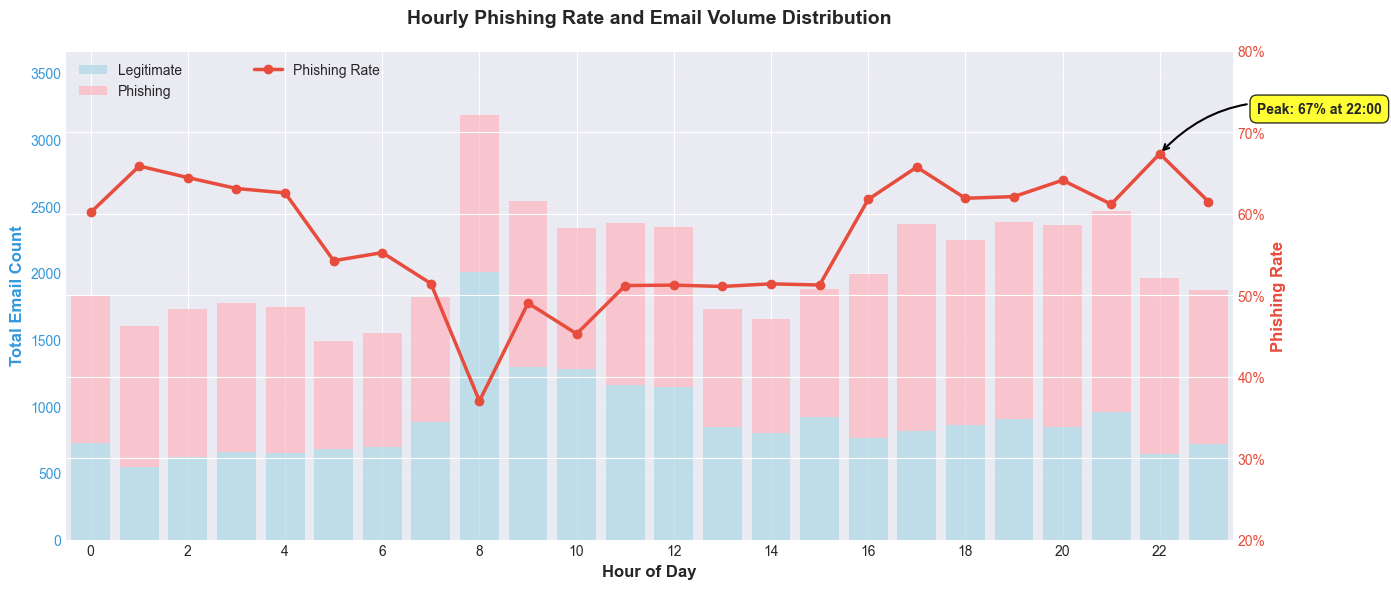

In [13]:
# --- Hourly Distribution Summary ---
# Calculate hourly statistics
hourly_stats = df_cleaned.groupby('hour').agg({
    'label': ['sum', 'count']
}).reset_index()
hourly_stats.columns = ['hour', 'phishing_count', 'total_count']
hourly_stats['phishing_rate'] = (hourly_stats['phishing_count'] / hourly_stats['total_count'] * 100)
hourly_stats['legitimate_count'] = hourly_stats['total_count'] - hourly_stats['phishing_count']

# Ensure all 24 hours are present
all_hours = pd.DataFrame({'hour': range(24)})
hourly_stats = all_hours.merge(hourly_stats, on='hour', how='left').fillna(0)

# Find peak hour
peak_hour = hourly_stats.loc[hourly_stats['phishing_rate'].idxmax()]

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

# Left axis: Stacked bars (Email Volume)
x_pos = hourly_stats['hour']
bars_legit = ax1.bar(x_pos, hourly_stats['legitimate_count'], 
                     label='Legitimate', color='#ADD8E6', alpha=0.7, 
                     edgecolor='none', width=0.8)
bars_phish = ax1.bar(x_pos, hourly_stats['phishing_count'], 
                     bottom=hourly_stats['legitimate_count'],
                     label='Phishing', color='#FFB6C1', alpha=0.7, 
                     edgecolor='none', width=0.8)

# Right axis: Line plot (Phishing Rate)
line = ax2.plot(hourly_stats['hour'], hourly_stats['phishing_rate'], 
                color='#E74C3C', marker='o', linewidth=2.5, markersize=6,
                label='Phishing Rate', zorder=10)

# Highlight peak hour with annotation
ax2.annotate(f'Peak: {peak_hour["phishing_rate"]:.0f}% at {int(peak_hour["hour"])}:00',
             xy=(peak_hour['hour'], peak_hour['phishing_rate']),
             xytext=(peak_hour['hour'] + 2, peak_hour['phishing_rate'] + 5),
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8, edgecolor='black'),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', 
                           color='black', lw=1.5))

# Customize left y-axis (Email Volume)
ax1.set_ylabel('Total Email Count', fontsize=12, fontweight='bold', color='#3498DB')
ax1.tick_params(axis='y', labelcolor='#3498DB')
ax1.set_ylim(0, max(hourly_stats['total_count']) * 1.15)

# Customize right y-axis (Phishing Rate)
ax2.set_ylabel('Phishing Rate', fontsize=12, fontweight='bold', color='#E74C3C')
ax2.tick_params(axis='y', labelcolor='#E74C3C')
ax2.set_ylim(20, 80)
ax2.set_yticks(range(20, 81, 10))
ax2.set_yticklabels([f'{y}%' for y in range(20, 81, 10)])

# Customize x-axis
ax1.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax1.set_xticks(range(0, 24, 2))
ax1.set_xlim(-0.5, 23.5)

# Title
ax1.set_title('Hourly Phishing Rate and Email Volume Distribution', 
              fontsize=14, fontweight='bold', pad=20)

# Combined legend
bars_legend = ax1.legend(loc='upper left', fontsize=10, framealpha=0.9, edgecolor='black')
line_legend = ax2.legend(loc='upper left', bbox_to_anchor=(0.15, 1), 
                        fontsize=10, framealpha=0.9, edgecolor='black')

# Grid
ax1.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
ax1.set_axisbelow(True)

plt.tight_layout()

output_file = OUTPUT_DIR / '4.2.3_hourly_distribution.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Saved: {output_file}")

plt.show()
plt.close()

In [14]:
# --- Sender Behavioral Analysis: Prepare Data ---
from scipy.stats import chi2_contingency
from scipy import stats

# Calculate sender statistics
sender_stats = df_cleaned.groupby('sender').agg({
    'label': ['first', 'count']
}).reset_index()
sender_stats.columns = ['sender', 'label', 'total_emails']

# Split into legitimate and phishing senders
legitimate_senders = sender_stats[sender_stats['label'] == 0].copy()
phishing_senders = sender_stats[sender_stats['label'] == 1].copy()

# Calculate max emails per hour for each sender
max_emails_per_hour = df_cleaned.groupby('sender').apply(
    lambda x: x.set_index('date').resample('1h').size().max()
).reset_index()
max_emails_per_hour.columns = ['sender', 'max_per_hour']

# Merge with sender stats
sender_stats = sender_stats.merge(max_emails_per_hour, on='sender', how='left')

# Split max_per_hour by class
legitimate_max = sender_stats[sender_stats['label'] == 0]['max_per_hour']
phishing_max = sender_stats[sender_stats['label'] == 1]['max_per_hour']

# Calculate time gaps between emails for multi-email senders
df_sorted = df_cleaned.sort_values(['sender', 'date'])
df_sorted['time_gap'] = df_sorted.groupby('sender')['date'].diff()
df_sorted['gap_minutes'] = df_sorted['time_gap'].dt.total_seconds() / 60

time_gaps = df_sorted[df_sorted['gap_minutes'].notna()][['sender', 'gap_minutes']].copy()
time_gaps = time_gaps.merge(sender_stats[['sender', 'label']], on='sender', how='left')
time_gaps['sender_type'] = time_gaps['label'].map({0: 'Legitimate', 1: 'Phishing'})

print("✅ Sender behavioral data prepared")

✅ Sender behavioral data prepared


/var/folders/bs/rgms05cn523bt4l81pl47lhc0000gn/T/ipykernel_19331/4066940221.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_emails_per_hour = df_cleaned.groupby('sender').apply(


/var/folders/bs/rgms05cn523bt4l81pl47lhc0000gn/T/ipykernel_19331/2007038338.py:151: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[2].boxplot([legit_gaps_log, phish_gaps_log],



⏳ Analyzing sender behavioral patterns...
✅ Panel A: Phishing ≤1/hr=98.3%, Legit ≤1/hr=75.8%
✅ Panel B: Phishing single-use=97.3%, Legit=50.8%
✅ Panel C: Phishing median=1.0min, Legit=44.9min

🎨 Creating 3-panel figure...
✅ Saved: ../../figures/4.2.3_sender_behavioral_patterns.png


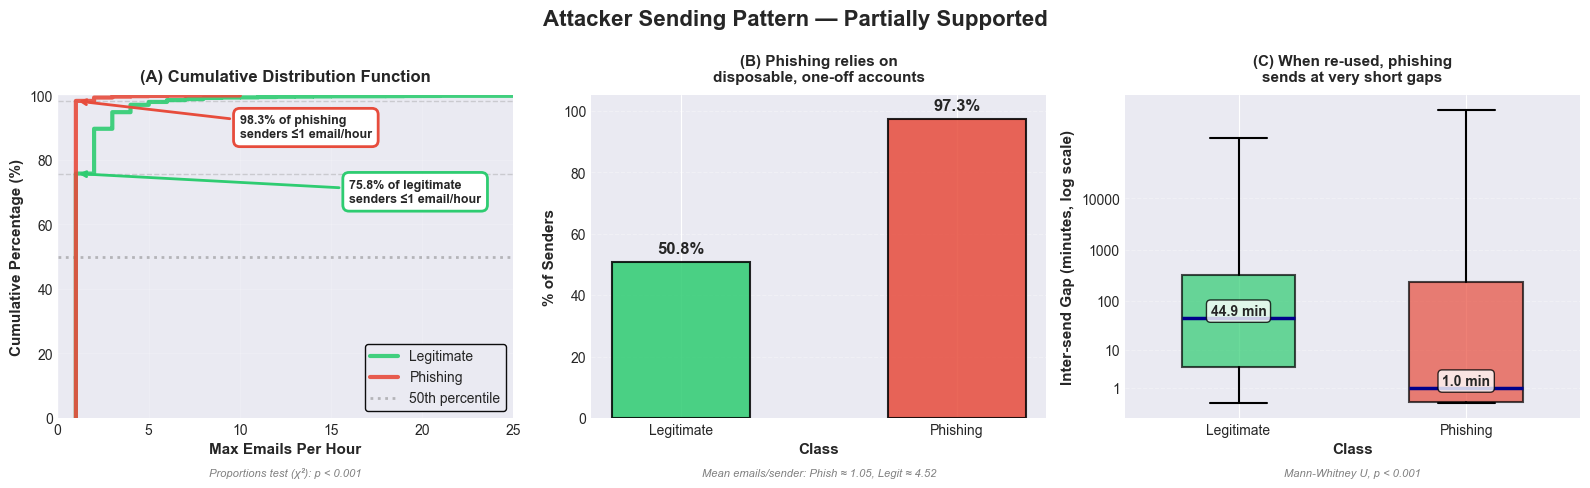

In [15]:
# =============================================================================
# CREATE 3-PANEL SENDER BEHAVIORAL FIGURE
# =============================================================================

print("\n⏳ Analyzing sender behavioral patterns...")

# --- Panel A: Burst data ---
legit_burst_low_pct = (legitimate_max <= 1).mean() * 100
phish_burst_low_pct = (phishing_max <= 1).mean() * 100

legit_burst_low = (legitimate_max <= 1).sum()
legit_burst_high = (legitimate_max > 1).sum()
phish_burst_low = (phishing_max <= 1).sum()
phish_burst_high = (phishing_max > 1).sum()

burst_contingency = np.array([[legit_burst_low, legit_burst_high],
                               [phish_burst_low, phish_burst_high]])
chi2_burst, p_burst, dof_burst, expected_burst = chi2_contingency(burst_contingency)

print(f"✅ Panel A: Phishing ≤1/hr={phish_burst_low_pct:.1f}%, Legit ≤1/hr={legit_burst_low_pct:.1f}%")

# --- Panel B: Single-use data ---
legit_single_pct = (legitimate_senders['total_emails'] == 1).mean() * 100
phish_single_pct = (phishing_senders['total_emails'] == 1).mean() * 100
legit_mean_emails = legitimate_senders['total_emails'].mean()
phish_mean_emails = phishing_senders['total_emails'].mean()

print(f"✅ Panel B: Phishing single-use={phish_single_pct:.1f}%, Legit={legit_single_pct:.1f}%")

# --- Panel C: Inter-send gaps ---
multi_email_senders = sender_stats[sender_stats['total_emails'] >= 2]['sender']
time_gaps_multi = time_gaps[time_gaps['sender'].isin(multi_email_senders)]
legit_gaps_multi = time_gaps_multi[time_gaps_multi['sender_type'] == 'Legitimate']['gap_minutes']
phish_gaps_multi = time_gaps_multi[time_gaps_multi['sender_type'] == 'Phishing']['gap_minutes']

legit_median_gap = legit_gaps_multi.median()
phish_median_gap = phish_gaps_multi.median()
stat_mw, p_mw = stats.mannwhitneyu(legit_gaps_multi, phish_gaps_multi, alternative='two-sided')

print(f"✅ Panel C: Phishing median={phish_median_gap:.1f}min, Legit={legit_median_gap:.1f}min")

print("\n🎨 Creating 3-panel figure...")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Attacker Sending Pattern — Partially Supported', 
             fontsize=16, fontweight='bold', y=0.99)

# Colors
legit_color = '#2ecc71'  # Green
phish_color = '#e74c3c'  # Red

# =============================================================================
# PANEL A: Cumulative Distribution Function
# =============================================================================

# Calculate ECDF
legit_sorted = np.sort(legitimate_max)
phish_sorted = np.sort(phishing_max)
legit_ecdf = np.arange(1, len(legit_sorted) + 1) / len(legit_sorted) * 100
phish_ecdf = np.arange(1, len(phish_sorted) + 1) / len(phish_sorted) * 100

# Plot CDFs
axes[0].plot(legit_sorted, legit_ecdf, 
            label='Legitimate', linewidth=3, color=legit_color, 
            alpha=0.9, drawstyle='steps-post')
axes[0].plot(phish_sorted, phish_ecdf, 
            label='Phishing', linewidth=3, color=phish_color, 
            alpha=0.9, drawstyle='steps-post')

# Add 50th percentile reference line
axes[0].axhline(y=50, color='gray', linestyle=':', linewidth=2, 
               alpha=0.5, label='50th percentile', zorder=1)

# Add horizontal guide lines
axes[0].axhline(y=phish_burst_low_pct, color='gray', linestyle='--', 
               linewidth=1, alpha=0.3, zorder=1)
axes[0].axhline(y=legit_burst_low_pct, color='gray', linestyle='--', 
               linewidth=1, alpha=0.3, zorder=1)

# Annotations
axes[0].annotate(f'{phish_burst_low_pct:.1f}% of phishing\nsenders ≤1 email/hour', 
                xy=(1, phish_burst_low_pct),
                xytext=(10, 87),
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                         edgecolor=phish_color, linewidth=2),
                arrowprops=dict(arrowstyle='->', color=phish_color, lw=2),
                zorder=5)

axes[0].annotate(f'{legit_burst_low_pct:.1f}% of legitimate\nsenders ≤1 email/hour', 
                xy=(1, legit_burst_low_pct),
                xytext=(16, 67),
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                         edgecolor=legit_color, linewidth=2),
                arrowprops=dict(arrowstyle='->', color=legit_color, lw=2),
                zorder=5)

axes[0].set_xlabel('Max Emails Per Hour', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Cumulative Percentage (%)', fontsize=11, fontweight='bold')
axes[0].set_title('(A) Cumulative Distribution Function', 
                  fontsize=12, fontweight='bold', pad=10)
axes[0].set_xlim(0, 25)
axes[0].set_ylim(0, 100)
axes[0].legend(loc='lower right', fontsize=10, framealpha=0.95, 
              edgecolor='black', frameon=True)
axes[0].grid(True, alpha=0.25, linestyle='-', linewidth=0.5, zorder=0)
axes[0].set_axisbelow(True)
axes[0].text(0.5, -0.18, f'Proportions test (χ²): p < 0.001', 
            transform=axes[0].transAxes, ha='center', fontsize=8, 
            style='italic', color='gray')

# =============================================================================
# PANEL B: Disposable accounts
# =============================================================================

categories = ['Legitimate', 'Phishing']
single_use_data = [legit_single_pct, phish_single_pct]
colors_b = [legit_color, phish_color]

x_pos = np.arange(len(categories))
width = 0.5

bars = axes[1].bar(x_pos, single_use_data, width, color=colors_b, 
                   alpha=0.85, edgecolor='black', linewidth=1.5)

for i, (bar, pct) in enumerate(zip(bars, single_use_data)):
    axes[1].text(i, pct + 2, f'{pct:.1f}%', 
                ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[1].set_ylabel('% of Senders', fontsize=11, fontweight='bold')
axes[1].set_xlabel('Class', fontsize=11, fontweight='bold')
axes[1].set_title('(B) Phishing relies on\ndisposable, one-off accounts', 
                  fontsize=11, fontweight='bold', pad=10)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(categories, fontsize=10)
axes[1].set_ylim(0, 105)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

axes[1].text(0.5, -0.18, f'Mean emails/sender: Phish ≈ {phish_mean_emails:.2f}, Legit ≈ {legit_mean_emails:.2f}',
            transform=axes[1].transAxes, ha='center', fontsize=8, 
            style='italic', color='gray')

# =============================================================================
# PANEL C: Rapid cadence when re-used
# =============================================================================

legit_gaps_log = np.log10(legit_gaps_multi + 1)
phish_gaps_log = np.log10(phish_gaps_multi + 1)

bp = axes[2].boxplot([legit_gaps_log, phish_gaps_log], 
                      labels=categories,
                      patch_artist=True, widths=0.5,
                      boxprops=dict(linewidth=1.5),
                      medianprops=dict(color='darkblue', linewidth=2.5),
                      whiskerprops=dict(linewidth=1.5),
                      capprops=dict(linewidth=1.5),
                      showfliers=False)

bp['boxes'][0].set_facecolor(legit_color)
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor(phish_color)
bp['boxes'][1].set_alpha(0.7)

axes[2].set_ylabel('Inter-send Gap (minutes, log scale)', fontsize=11, fontweight='bold')
axes[2].set_xlabel('Class', fontsize=11, fontweight='bold')
axes[2].set_title('(C) When re-used, phishing\nsends at very short gaps', 
                  fontsize=11, fontweight='bold', pad=10)
axes[2].grid(axis='y', alpha=0.3, linestyle='--')

medians_log = [np.log10(legit_median_gap + 1), np.log10(phish_median_gap + 1)]
for i, (median_log, median_actual) in enumerate(zip(medians_log, [legit_median_gap, phish_median_gap])):
    axes[2].text(i+1, median_log, f'{median_actual:.1f} min', 
                ha='center', va='bottom', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                         edgecolor='black', alpha=0.8))

axes[2].text(0.5, -0.18, 'Mann-Whitney U, p < 0.001',
            transform=axes[2].transAxes, ha='center', fontsize=8, 
            style='italic', color='gray')

y_ticks_log = np.log10(np.array([1, 10, 100, 1000, 10000]) + 1)
y_tick_labels = ['1', '10', '100', '1000', '10000']
axes[2].set_yticks(y_ticks_log)
axes[2].set_yticklabels(y_tick_labels)

# =============================================================================
# FINALIZE
# =============================================================================

plt.tight_layout()

output_file = OUTPUT_DIR / '4.2.3_sender_behavioral_patterns.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Saved: {output_file}")

plt.show()
plt.close()

---

## 5. Temporal Features Selected for Model Training

Based on the exploratory analysis and feature engineering performed above, the following **temporal features** have been selected for phishing detection model training:

### 5.1 Geographic Feature
Generated from `timezone_offset` using `TemporalFeatureEngineer.add_timezone_region()`:

| Feature | Type | Description | Categories |
|---------|------|-------------|------------|
| **`timezone_region`** | Categorical | Geographic region based on timezone offset | Americas, Europe/Africa, Middle East/South Asia, APAC, Oceania/Pacific, Unknown |

**Key insights:**
- Invalid timezones (outside UTC-12 to UTC+14) are marked as 'Unknown'
- Geographic patterns show significant variation in phishing rates across regions
- This feature captures attacker location/infrastructure patterns

### 5.2 Advanced Temporal Features (Time-Aware)
Generated using `TemporalFeatureEngineer.add_all_advanced_features()`:

| Feature | Type | Description | Key Properties |
|---------|------|-------------|----------------|
| `is_night` | Binary | Nighttime hours flag (22:00-06:00) | 0 or 1 |
| `sender_historical_phishing_rate` | Numeric | Historical phishing rate of sender | 0-1, time-aware |
| `sender_historical_count` | Numeric | Number of previous emails from sender | 0+ (count) |
| `current_time_gap` | Numeric | Minutes since sender's last email | 0+ (minutes) |
| `sender_time_gap_std` | Numeric | Std dev of historical time gaps | 0+ (minutes) |

**Important Notes:**
- All sender-based features are **time-aware** to prevent data leakage
- For each email at time T, only information from emails BEFORE time T is used
- Features capture sender behavioral patterns: burst sending, disposability, cadence
- Ready for production deployment (no future data contamination)

### 5.3 Feature Selection Summary

**Total temporal features selected for modeling: 6**
- 1 geographic feature (**timezone_region**) ⭐
- 5 advanced behavioral features (is_night, sender_historical_phishing_rate, sender_historical_count, current_time_gap, sender_time_gap_std)

**Features NOT selected for modeling:**
- Basic temporal features (year, month, day, hour, minute, day_of_week) - used for EDA only
- `timezone_offset` (raw string, replaced by timezone_region)
- `month_name`, `day_name`, `date_only` (redundant/non-numeric)

**Final features for modeling:** Use the 6 features listed above (1 geographic + 5 advanced behavioral).

---

**Implementation:** All features can be generated using the `TemporalFeatureEngineer` class:
```python
from temporal_feature_engineering import TemporalFeatureEngineer

engineer = TemporalFeatureEngineer()
df_features = engineer.process_all(df, date_col='date', extract_features=True)
df_final = engineer.add_all_advanced_features(df_features)

# Selected features for modeling
model_features = [
    'timezone_region',
    'is_night',
    'sender_historical_phishing_rate',
    'sender_historical_count',
    'current_time_gap',
    'sender_time_gap_std'
]
```